In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np


In [4]:
ab_test = pd.read_csv('ab_test_data.csv')
ab_test.head()

,user_id,timestamp,test_group,conversion
0,7f6833e6-1141-4f20-b4b2-f1e31019b1fd,2023-07-04 04:40:55.848109,a,0
1,e6a6e960-d3f3-4074-a516-ba1e609b211e,2023-07-06 00:26:45.486187,b,0
2,4d3fbfa5-6847-410a-bac2-477f01d5f400,2023-07-10 20:24:33.639464,b,0
3,361457d9-a044-48f7-981c-d67dc3861679,2023-07-20 07:04:49.957013,b,0
4,285cd63d-7d03-427f-a062-1fa2dd2e77d6,2023-07-19 23:27:50.116680,b,0


In [5]:
#verific tipul de date
ab_test_data = pd.DataFrame(ab_test)
print(ab_test_data.dtypes)

user_id       object
timestamp     object
test_group    object
conversion     int64
dtype: object


# Numarul de utilizatori in grupele A si B

In [6]:
nr_utilizatori  = ab_test_data['test_group'].value_counts()
nr_utilizatori

test_group
a    10013
b     9985
Name: count, dtype: int64

# Numarul de conversii in grupurile A si B

In [7]:
#selectez toate inregistrarile din setul de date ab_test_data care au valoarea 1 pe coloana conversion apoi fac suma valorilor acestora
conversii = ab_test_data[ab_test_data['conversion'] == 1]
conversii.sum()

user_id       b22928dd-1413-4c50-a239-45378cd4f7b396ecc004-2...
timestamp     2023-07-07 19:35:26.6691722023-07-24 11:38:53....
test_group    abbbabbbabbaabbaabbaaaaaaaaaabbabbbbbabbbabbbb...
conversion                                                 1500
dtype: object

In [8]:
#grupez valorile rezultate in functie de grup A respectiv B
conversii_grupate = conversii['test_group'].value_counts()
conversii_grupate

test_group
b    889
a    611
Name: count, dtype: int64

# Rata de conversie în grupurile A și B

In [9]:
#Calculez rata de conversie pentru grupa A si o afisez
cr_a = conversii_grupate['a'] / nr_utilizatori['a']
cr_a

0.06102067312493758

In [10]:
#Calculez rata de conversie pentru grupa B si o afisez
cr_b = conversii_grupate['b'] / nr_utilizatori['b']
cr_b

0.08903355032548824

# Data de început și data de sfârșit a testului, împreună cu durata acestuia în zile

In [11]:
dt_inceput = ab_test_data['timestamp'].min()
dt_sfarsit = ab_test_data['timestamp'].max()

In [12]:
dt_inceput

'2023-07-03 01:42:34.033708'

In [13]:
dt_sfarsit

'2023-07-25 01:41:19.152664'

In [14]:
#Convertesc valorile coloanei timestamp din ab_test_data in obiect de tip datetime 
ab_test_data['timestamp'] = pd.to_datetime(ab_test_data['timestamp'])

In [15]:
inceput = ab_test_data['timestamp'].min()
sfarsit = ab_test_data['timestamp'].max()

In [18]:
#Calculez diferenta dintre data de sfarsit si cea de inceput si o exprim in zile
durata_test = (sfarsit - inceput).days

In [19]:
durata_test

21

# Alege un criteriu statistic pentru a testa ipotezele și calcula statistica și p-value. Verifică dacă putem respinge ipoteza nulă.

In [21]:
alpha = 0.05
t_statistic, p_value = stats.ttest_ind(ab_test_data[ab_test_data['test_group'] == 'a']['conversion'],
                                       ab_test_data[ab_test_data['test_group'] == 'b']['conversion'])
print(f't-statistic: {round(t_statistic, 2)}, p-value: {round(p_value, 2)}')

t-statistic: -7.53, p-value: 0.0


In [22]:
if p_value < alpha:
    print('Diferența este semnificativă statistic, H0 este respinsă.')
else:
    print('Diferența nu este semnificativă statistic, H0 se susține.')

Diferența este semnificativă statistic, H0 este respinsă.


# O vizualizare pentru a compara valorile medii în grupurile cu intervale de încredere de 95%

In [23]:
grupa_a = ab_test_data[ab_test_data['test_group'] == 'a']['conversion']
grupa_b = ab_test_data[ab_test_data['test_group'] == 'b']['conversion']

In [29]:
#Calculez media pe grupe A si B
media_a = grupa_a.mean()
media_b = grupa_b.mean()

In [30]:
#Deviatia standar pe grupe A si B
stdev_a = grupa_a.std()
stdev_b = grupa_b.std()

In [26]:
#Nr de inregistrari pe fiecare grupa 
dimensiune_a = len(grupa_a)
dimensiune_b = len(grupa_b)

In [27]:
dimensiune_a

10013

In [28]:
dimensiune_b

9985

In [31]:
#Eroarea standard pt fiecare grupa 
standard_err_a = stdev_a / np.sqrt(dimensiune_a)
standard_err_b = stdev_b / np.sqrt(dimensiune_b)

In [32]:
standard_err_a

0.0023922474036904267

In [33]:
standard_err_b

0.0028502027249147003

In [34]:
#Calculez intervalul de incredere pt media conversiilor fiecarei grupe 
incredere_a = (media_a - 1.96 * standard_err_a, media_a + 1.96 * standard_err_a)
incredere_b = (media_b - 1.96 * standard_err_b, media_b + 1.96 * standard_err_b)

In [35]:
incredere_a

(0.05633186821370434, 0.06570947803617082)

In [36]:
incredere_b

(0.08344715298465542, 0.09461994766632105)

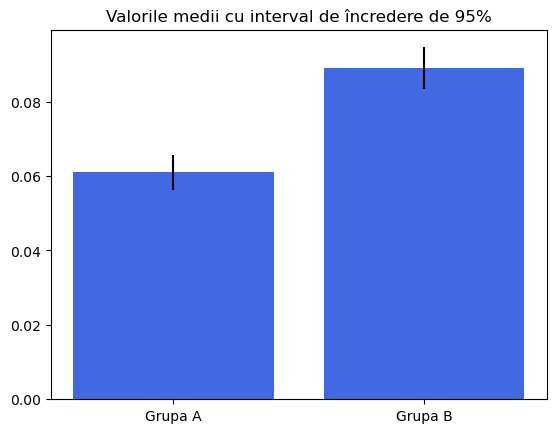

In [39]:
#Creez graficul pent vizualizare a valoriilor medii ale conversiilor pt cele doua grupe A si B
plt.bar(['Grupa A', 'Grupa B'], [media_a, media_b], yerr=[1.96 * standard_err_a, 1.96 * standard_err_b], color= 'royalblue')
plt.title('Valorile medii cu interval de încredere de 95%')
plt.show()

In [40]:
#In concluze putem spune ca in urma testarii A/B ce a durat 21 de zile prima ipoteza cea nula poate fi respinsa deoarece
#grupa B a aratat (conform graficului de mai sus) o crestere semnificativa fata de grupa A,
#fap ce demonstreaza ca folosirea ecranului alternativ a adus rezultatele dorite (conform cu ipoteza H1 -